<a href="https://colab.research.google.com/github/pcsilcan/ca/blob/master/20202/ca_20202_0601_toposort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topological sort

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [10]:
def grafoBase():
    G = nx.DiGraph()
    G.add_node(0, id=0, name="undies",      pos=(1, 8))
    G.add_node(1, id=1, name="pants",       pos=(1, 6))
    G.add_node(2, id=2, name="belt",        pos=(1, 4))
    G.add_node(3, id=3, name="shirt",       pos=(2, 5))
    G.add_node(4, id=4, name="tie",         pos=(2, 3))
    G.add_node(5, id=5, name="jacket",      pos=(2, 1))
    G.add_node(6, id=6, name="socks",       pos=(3, 8))
    G.add_node(7, id=7, name="shoes",       pos=(3, 6))
    G.add_node(8, id=8, name="watch",       pos=(4, 7))

    G.add_edges_from([(0, 1), (0, 7),
                      (1, 2), (1, 7),
                      (2, 5),
                      (3, 2), (3, 4),
                      (4, 5),
                      (6, 7)])
    
    return G

In [11]:
G = grafoBase()

In [50]:
def drawit(G, pos_nodes=None, figsize=(15, 15), cs=None):
    plt.figure(1, figsize=figsize)
    if not pos_nodes:
        pos_nodes=[(x, y) for x, y in nx.get_node_attributes(G, 'pos').values()]
    lbl_nodes=nx.get_node_attributes(G, 'name')
    nx.draw_networkx_nodes(G, pos_nodes, node_size=5000,
                        node_color=range(9), cmap=plt.cm.Wistia)
    nx.draw_networkx_edges(G, pos_nodes, node_size=5000,
                           width=2, arrowsize=20,
                           connectionstyle=cs)
    nx.draw_networkx_labels(G, pos=pos_nodes, labels=lbl_nodes)

    plt.axis('off')
    plt.show()

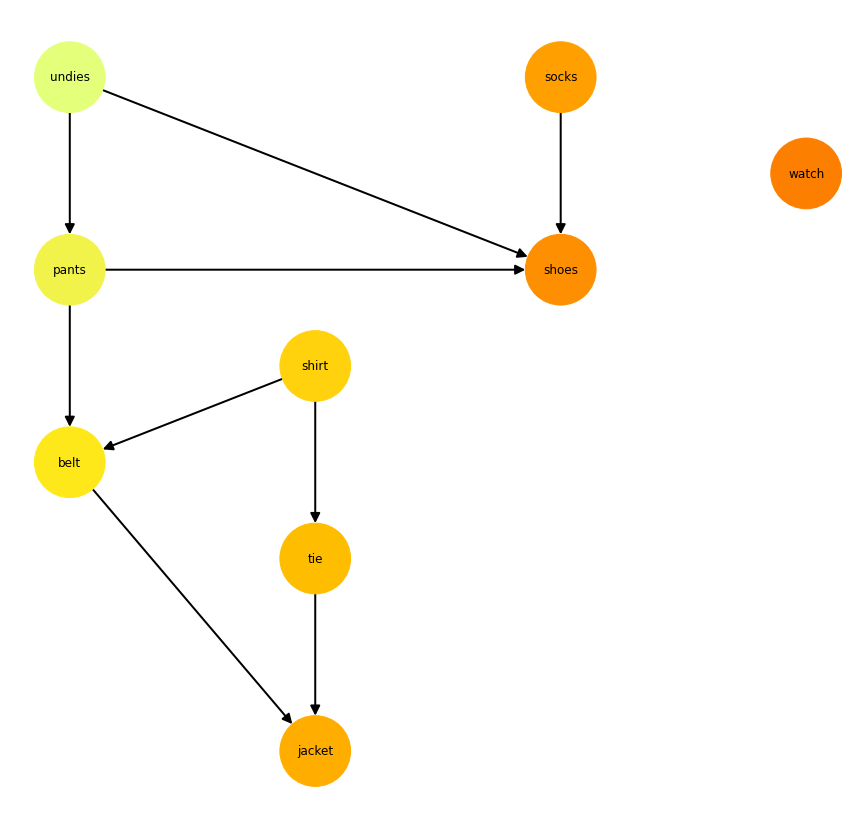

In [51]:
drawit(G)

In [40]:
def dfs(G):
    def dfsVisit(u):
        color[u['id']] = 'gray'
        time[0] += 1
        d[u['id']] = time[0]
        for _, vid in G.out_edges(u['id']):
            v = G.nodes[vid]
            if color[v['id']] == 'white':
                π[v['id']] = u
                dfsVisit(v)
        color[u['id']] = 'black'
        time[0] += 1
        u['f'] = time[0]
        u['order'] = order[0]
        order[0] -= 1

    n = G.number_of_nodes()
    color = ['white']*n
    π = [None]*n
    d = [0]*n

    time = [0]
    order = [n]
    for _, u in G.nodes(data=True):
        if color[u['id']] == 'white':
            dfsVisit(u)

    return π, d

In [42]:
_,_ = dfs(G)

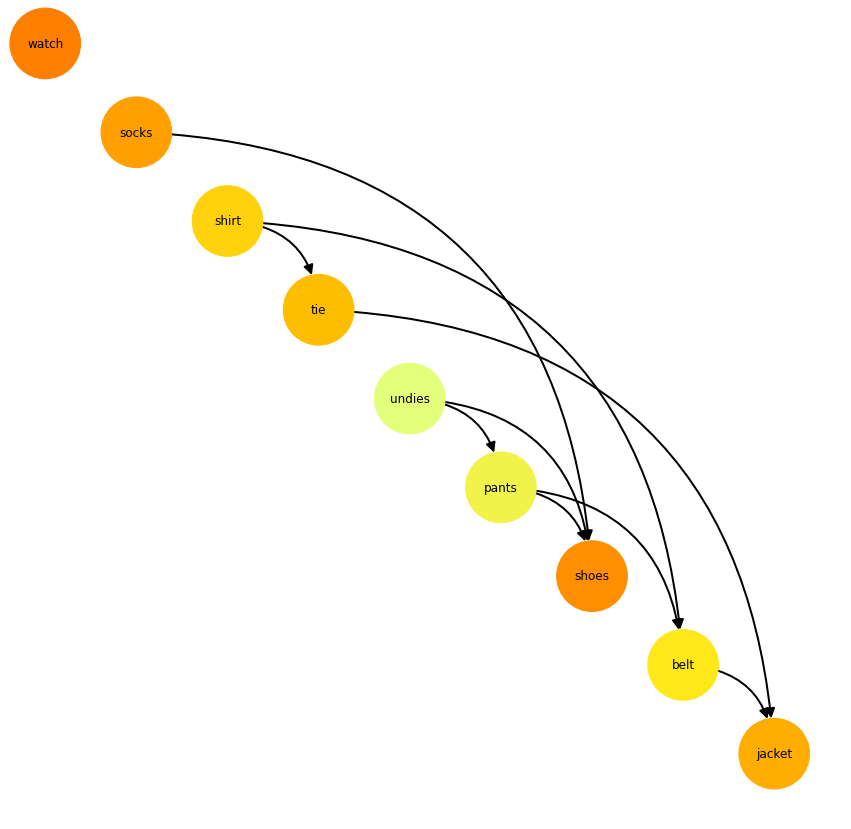

In [78]:
pos_nodes=[(x, 10 - x) for x in nx.get_node_attributes(G, 'order').values()]
drawit(G, pos_nodes, (15, 15), 'arc3, rad=-.45')